# Kaggle Learn - Pandas

Working through lessons from https://www.kaggle.com/learn/pandas

## Level 2: Indexing, Selecting & Assigning

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('max_rows', 5)

reviews = pd.read_csv('data/winemag-data-130k-v2.csv', index_col=0)
reviews

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss
129970,France,"Big, rich and off-dry, this is powered by inte...",Lieu-dit Harth Cuvée Caroline,90,21.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Schoffit 2012 Lieu-dit Harth Cuvée Car...,Gewürztraminer,Domaine Schoffit


### Naive Accessors

Pandas dataframes and series allow column selection as an attribute or index operator (ie df.column_named or \["column_name"\]). However, pandas accessor operators, .loc and .iloc, are more efficient. 

### Selection

**df.loc** selects by label<br>
> A colon, **:**, can be used to select all rows.<br> 
  It can also select rows or columns in a range (ie. 1:10 or 'a':'m')<br>
  Note: this always depends on names and not position in the table<br>
  Note: contrary to python slices, the stop is included!!! for .loc slices

**df.iloc** selects by position<br>
> If the order of the tabel changes, this selects different cells<br>
> Can incorporate steps and negative numbers (i.e. \[::2\] or \[::-1\])<br>
> Note: back to usual python slices, the stop is not included for .iloc slices

In [2]:
# Select row by index name - loc
print('# loc')
print(reviews.loc[0])
print('\n')

# Select row by index number (position in table) - iloc
print('# iloc')
print(reviews.iloc[0])
print('\n')

# Above these are the same, since the index names are the numbered rows
#   however if the table was reordered it would be different

# loc sorted dataframe
print('# loc (from sorted dataframe)')   # index 0 is still 0, wherever sort put it
print(reviews.sort_values(['country']).loc[0])
print('\n')

# iloc sorted dataframe
print('# iloc (from sorted dataframe)')
print(reviews.sort_values(['country']).iloc[0])
print('\n')

# loc
country                                                    Italy
description    Aromas include tropical fruit, broom, brimston...
                                     ...                        
variety                                              White Blend
winery                                                   Nicosia
Name: 0, Length: 13, dtype: object


# iloc
country                                                    Italy
description    Aromas include tropical fruit, broom, brimston...
                                     ...                        
variety                                              White Blend
winery                                                   Nicosia
Name: 0, Length: 13, dtype: object


# loc (from sorted dataframe)
country                                                    Italy
description    Aromas include tropical fruit, broom, brimston...
                                     ...                        
variety                               

In [21]:
# Select a column by column name - loc
#  Here you must also specify the rows by index name or 
#  use : for all the rows (the entire column)
print(reviews.loc[:, 'country'])
print('\n')

# Select a column by column index number (position in table)
#  Here you must also specify the rows by index number or use :
print(reviews.iloc[:, 0])
print('\n')

#  Note: the row indexes do not have a column, they are always included
#        when a dataframe is returned and are also returned by .index.values
print(reviews.index.values)

0            Italy
1         Portugal
            ...   
129969      France
129970      France
Name: country, Length: 129971, dtype: object


0            Italy
1         Portugal
            ...   
129969      France
129970      France
Name: country, Length: 129971, dtype: object


[     0      1      2 ... 129968 129969 129970]


In [4]:
# Selection of a specific cell (row and column) returns that value as its type
print(reviews.iloc[4, 4])
print(type(reviews.iloc[4, 4]))
print('\n')

# Selection of a single row or column returns a series
print(reviews.iloc[4])
print(type(reviews.iloc[4]))
print('\n')
print(reviews.iloc[:, 4])
print(type(reviews.iloc[:, 4]))

# if a dataframe is desired specify a range for only that value
display(reviews.iloc[4:5, 4:5])
print(type(reviews.iloc[4:5, 4:5]))

65.0
<class 'numpy.float64'>


country                                                       US
description    Much like the regular bottling from 2012, this...
                                     ...                        
variety                                               Pinot Noir
winery                                              Sweet Cheeks
Name: 4, Length: 13, dtype: object
<class 'pandas.core.series.Series'>


0          NaN
1         15.0
          ... 
129969    32.0
129970    21.0
Name: price, Length: 129971, dtype: float64
<class 'pandas.core.series.Series'>


,price
4,65.0


<class 'pandas.core.frame.DataFrame'>


In [5]:
# Select using lists of index and column labels
#   Note: index uses labels, order does not change if sorted first
print(reviews.sort_values('price').loc[[0, 1, 10, 100], \
             ['price', 'country', 'province', 'region_1', 'region_2']])
print()

# Select using list of index position and column labels
#   Note: index uses position, order changes if sorted first
print(reviews.sort_values('price').iloc[[0, 1, 10, 100]].\
      loc[:, ['price', 'country', 'province', 'region_1', 'region_2']])

     price   country           province      region_1      region_2
0      NaN     Italy  Sicily & Sardinia          Etna           NaN
1     15.0  Portugal              Douro           NaN           NaN
10    19.0        US         California   Napa Valley          Napa
100   18.0        US           New York  Finger Lakes  Finger Lakes

        price country    province    region_1          region_2
20484     4.0      US  California  Clarksburg    Central Valley
112919    4.0   Spain     Levante       Yecla               NaN
110255    4.0      US  California  California  California Other
93800     6.0      US  California  California  California Other


In [6]:
# .loc vs .iloc slices
print(reviews.iloc[0:100].loc[:, ['country', 'variety']])  # .iloc typical python slice
print(reviews.loc[0:99, ['country', 'variety']])  # .loc includes stop

     country                   variety
0      Italy               White Blend
1   Portugal            Portuguese Red
..       ...                       ...
98     Italy                Sangiovese
99        US  Bordeaux-style Red Blend

[100 rows x 2 columns]
     country                   variety
0      Italy               White Blend
1   Portugal            Portuguese Red
..       ...                       ...
98     Italy                Sangiovese
99        US  Bordeaux-style Red Blend

[100 rows x 2 columns]


### Setting row index (row labels)

In [7]:
# The index can be set to any column or collection of columns
#   note: if the column had multiple, identical entries this may cause problems
#         verify_integrity=True checks for this, but decreases method performance
#   default is to return a new table, in_place=False
#   default is to delete columns being used as new index, drop=True
#   default is to not append the new index to the existing index, append=False
#     doesn't otherwise keep the index being replaced as a column

reviews.set_index('title')

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,variety,winery
title,,,,,,,,,,,,
Nicosia 2013 Vulkà Bianco (Etna),Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,White Blend,Nicosia
Quinta dos Avidagos 2011 Avidagos Red (Douro),Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Portuguese Red,Quinta dos Avidagos
...,...,...,...,...,...,...,...,...,...,...,...,...
Domaine Marcel Deiss 2012 Pinot Gris (Alsace),France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Pinot Gris,Domaine Marcel Deiss
Domaine Schoffit 2012 Lieu-dit Harth Cuvée Caroline Gewurztraminer (Alsace),France,"Big, rich and off-dry, this is powered by inte...",Lieu-dit Harth Cuvée Caroline,90,21.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Gewürztraminer,Domaine Schoffit


### Conditional Selection

Pandas conditional selectors for series: <br>
> == <br>
  != <br>
  < <br>
  <= <br>
  \> <br>
  \>= <br>
> 
  &  <br>
  | <br>
  ~ <br>
> 
  .isin <br>
  .isnull <br>
  .notnull <br>
>  
  .str.contains<br>

Pandas.where()<br>
> Different from SQL where<br>
  Used for selection output with the same shape as the original data<br>
  Values not meeting the selection criteria are replaced with null or <br> 
  an optional argument can be included to specify a replacement value <br>

In [8]:
reviews.loc[reviews.country == 'Italy']

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,NaN,Kerin O’Keefe,@kerinokeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129961,Italy,"Intense aromas of wild cherry, baking spice, t...",NaN,90,30.0,Sicily & Sardinia,Sicilia,NaN,Kerin O’Keefe,@kerinokeefe,COS 2013 Frappato (Sicilia),Frappato,COS
129962,Italy,"Blackberry, cassis, grilled herb and toasted a...",Sàgana Tenuta San Giacomo,90,40.0,Sicily & Sardinia,Sicilia,NaN,Kerin O’Keefe,@kerinokeefe,Cusumano 2012 Sàgana Tenuta San Giacomo Nero d...,Nero d'Avola,Cusumano


In [64]:
reviews.loc[reviews.loc[:, 'taster_name'].str.contains('Paul', na=False)]

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,critic,index_backwards
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,everyone,129968
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,everyone,129966
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129935,US,"This has lovely raspberry and cranberry fruit,...",NaN,91,38.0,Washington,Columbia Valley-Walla Walla Valley,Columbia Valley,Paul Gregutt,@paulgwine,Va Piano 2006 Syrah (Columbia Valley-Walla Wal...,Syrah,Va Piano,everyone,35
129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation,everyone,3


In [65]:
reviews.loc[reviews.region_2.notnull()]

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,critic,index_backwards
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,everyone,129968
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,everyone,129966
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129952,US,This Zinfandel from the eastern section of Nap...,NaN,90,22.0,California,Chiles Valley,Napa,Virginie Boone,@vboone,Houdini 2011 Zinfandel (Chiles Valley),Zinfandel,Houdini,everyone,18
129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation,everyone,3


0         87
1         87
          ..
129969    90
129970    90
Name: points, Length: 129971, dtype: int64


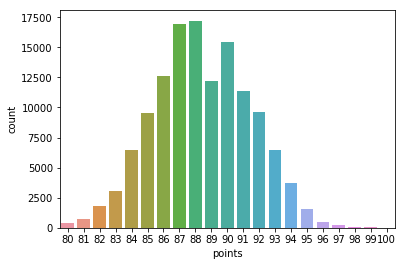

In [10]:
# Seaborn countplot shows counts of observations in each categorical bin
print(reviews.loc[:, 'points'])
sns.countplot(reviews.loc[:, 'points']) # Seaborn visualization returned by check_q10
plt.show()

0         87
1         87
          ..
129969    90
129970    90
Name: points, Length: 129971, dtype: int64


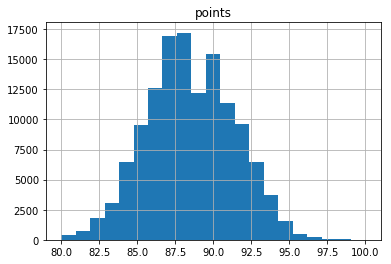

In [73]:
# pyplot doens't have builtin count plot, a histogram but doesn't looks as nice by default
print(reviews.loc[:, 'points'])
reviews.hist(column='points', bins=21) # 
plt.show()

In [11]:
# First 1000 dataframes, with index labels as consequative integers
print(reviews.iloc[0:1000].loc[:, 'points'])
print()
print(reviews.loc[:999, 'points'])
print()

# First 1000 dataframes, after sorting
#   loc is now going from the beginning of the table to index 999 
#   wherever that has wound up after sorting (note the length)
print(reviews.sort_values('points').iloc[0:1000].loc[:, 'points'])
print()
print(reviews.sort_values('points').loc[:999, 'points'])   

0      87
1      87
       ..
998    88
999    88
Name: points, Length: 1000, dtype: int64

0      87
1      87
       ..
998    88
999    88
Name: points, Length: 1000, dtype: int64

118056    80
35516     80
          ..
94611     81
94612     81
Name: points, Length: 1000, dtype: int64

118056    80
35516     80
          ..
1000      88
999       88
Name: points, Length: 63552, dtype: int64


In [12]:
# Last 1000 values
print(reviews.iloc[-1000:].loc[:, 'points'])
print()
print(reviews.loc[len(reviews) - 1000:, 'points'])

128971    91
128972    91
          ..
129969    90
129970    90
Name: points, Length: 1000, dtype: int64

128971    91
128972    91
          ..
129969    90
129970    90
Name: points, Length: 1000, dtype: int64


In [87]:
# Conditional returns series of booleans
# .loc on that series returns dataframe of rows where condition is True
# Selection of rows and columns in that dataframe can then be done as usual
print(reviews.country == 'Italy')
print()
display(reviews.loc[reviews.country == 'Italy'])
print()
print((reviews.loc[reviews.country == 'Italy'].loc[:, 'points']))

0          True
1         False
          ...  
129969    False
129970    False
Name: country, Length: 129971, dtype: bool



,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,critic,index_backwards
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,everyone,129970
6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,NaN,Kerin O’Keefe,@kerinokeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo,everyone,129964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129961,Italy,"Intense aromas of wild cherry, baking spice, t...",NaN,90,30.0,Sicily & Sardinia,Sicilia,NaN,Kerin O’Keefe,@kerinokeefe,COS 2013 Frappato (Sicilia),Frappato,COS,everyone,9
129962,Italy,"Blackberry, cassis, grilled herb and toasted a...",Sàgana Tenuta San Giacomo,90,40.0,Sicily & Sardinia,Sicilia,NaN,Kerin O’Keefe,@kerinokeefe,Cusumano 2012 Sàgana Tenuta San Giacomo Nero d...,Nero d'Avola,Cusumano,everyone,8



0         87
6         87
          ..
129961    90
129962    90
Name: points, Length: 19540, dtype: int64


119       France
120        Italy
           ...  
129969    France
129970    France
Name: country, Length: 15840, dtype: object


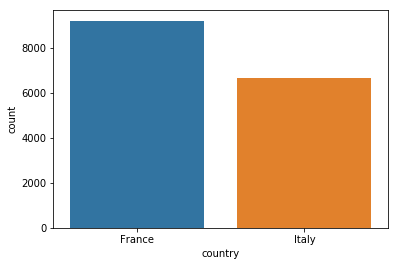

In [14]:
# Multiple conditions
print(reviews.loc[reviews.country.isin(['Italy', 'France']) & \
                  (reviews.points >= 90)].loc[:, 'country'])
sns.countplot(reviews.loc[reviews.country.isin(['Italy', 'France']) & \
                          (reviews.points >= 90)].loc[:, 'country'])
plt.show()

In [15]:
# null / not null condition
print(reviews.loc[reviews.price.isnull()].loc[:, 'price'])
print()
print(reviews.loc[reviews.price.notnull()].loc[:, 'price'])

0        NaN
13       NaN
          ..
129893   NaN
129964   NaN
Name: price, Length: 8996, dtype: float64

1         15.0
2         14.0
          ... 
129969    32.0
129970    21.0
Name: price, Length: 120975, dtype: float64


### Assigning data

In [16]:
# Assign entire column to the same value
#   Changes dataframe in place if column exists
#   Adds column to end of dataframe if label did not exist
reviews['critic'] =  'everyone'
reviews

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,critic
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,everyone
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,everyone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss,everyone
129970,France,"Big, rich and off-dry, this is powered by inte...",Lieu-dit Harth Cuvée Caroline,90,21.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Schoffit 2012 Lieu-dit Harth Cuvée Car...,Gewürztraminer,Domaine Schoffit,everyone


In [17]:
# Assign column to an iteratable of equal length 
reviews['index_backwards'] = range(len(reviews) - 1, -1, -1)
reviews.loc[:, 'index_backwards']

0         129970
1         129969
           ...  
129969         1
129970         0
Name: index_backwards, Length: 129971, dtype: int64

In [18]:
# more an assignment in future sections of tutorial